# I. Extract:
 


In [71]:
import numpy as np 
import pandas as pd 

## 1. Extract from CSV files: 

In [ ]:
# To see rows that contains a null value
df_population[df_population.isnull().any(axis = 1)]

# 2.Extract files from JSON: 

In [72]:
import pymongo 
from pymongo import MongoClient 

In [73]:
def mongoDB_to_python(connection_string,database,collection): 
    client = MongoClient(connection_string)
    db = client[database]
    collection = db[collection]
    cursor = collection.find()
    list_cur = list(cursor)
    df = pd.DataFrame(list_cur)
    return df

In [74]:
connection_string = 'mongodb://localhost:27017/'
database = 'local'
collection = 'population_data'
df_json2 = mongoDB_to_python(connection_string, database, collection)

In [75]:
df_json2.head(5)

,_id,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,Country Name,Country Code,Indicator Name,Indicator Code
0,678acb873eef33be10b2b4eb,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,Aruba,ABW,"Population, total",SP.POP.TOTL
1,678acb873eef33be10b2b4ec,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,...,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,Afghanistan,AFG,"Population, total",SP.POP.TOTL
2,678acb873eef33be10b2b4ed,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,...,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,Angola,AGO,"Population, total",SP.POP.TOTL
3,678acb873eef33be10b2b4ee,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,Albania,ALB,"Population, total",SP.POP.TOTL
4,678acb873eef33be10b2b4ef,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,Andorra,AND,"Population, total",SP.POP.TOTL


## 3. Extract from XML: 

In [76]:
from bs4 import BeautifulSoup 

with open('C:\\Users\\VICTUS\\Desktop\\personal project\\ETL_guided_project\\population_data.xml') as f: 
    soup = BeautifulSoup(f, "lxml")
i = 0
for record in soup.find_all('record'): 
    i+=1 
    for field in record.find_all('field'): 
        print(field['name'], ': ', field.text) 
    print()
    if i == 5: 
        break     

Country or Area :  Aruba
Item :  Population, total
Year :  1960
Value :  54211

Country or Area :  Aruba
Item :  Population, total
Year :  1961
Value :  55438

Country or Area :  Aruba
Item :  Population, total
Year :  1962
Value :  56225

Country or Area :  Aruba
Item :  Population, total
Year :  1963
Value :  56695

Country or Area :  Aruba
Item :  Population, total
Year :  1964
Value :  57032



## 4. Extract Data from SQL Databases: 

In [77]:
import requests 
import pandas as pd 

In [78]:
url = 'http://api.worldbank.org/v2/countries/br;cn;us;de/indicators/SP.POP.TOTL/?format=json&per_page=1000'
r = requests.get(url)



In [79]:
r.json()

[{'page': 1,
  'pages': 1,
  'per_page': 1000,
  'total': 256,
  'sourceid': '2',
  'lastupdated': '2024-12-16'},
 [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2023',
   'value': 211140729,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2022',
   'value': 210306415,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2021',
   'value': 209550294,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2020',

In [80]:
r.json()[0]

{'page': 1,
 'pages': 1,
 'per_page': 1000,
 'total': 256,
 'sourceid': '2',
 'lastupdated': '2024-12-16'}

In [81]:
pd.DataFrame(r.json()[1])

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2023,211140729,,,0
1,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2022,210306415,,,0
2,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2021,209550294,,,0
3,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2020,208660842,,,0
4,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2019,207455459,,,0
...,...,...,...,...,...,...,...,...
251,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1964,191889000,,,0
252,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1963,189242000,,,0
253,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1962,186538000,,,0
254,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1961,183691000,,,0


# 2. Transform: 

### 2.1. Combining and Cleaning: 

In [82]:
df_electric = pd.read_csv("C:\\Users\\VICTUS\\Desktop\\personal project\\ETL_guided_project\\electricity_access_percent.csv", skiprows = 4)
df_electric.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN


In [83]:
df_rural = pd.read_csv("C:\\Users\\VICTUS\\Desktop\\personal project\\ETL_guided_project\\rural_population_percent.csv", skiprows = 4)
df_rural.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


In [84]:
df_rural.drop("Unnamed: 62", axis = 1, inplace = True)
df_electric.drop("Unnamed: 62", axis = 1, inplace = True)

In [85]:
df = df_rural.merge(df_electric, how = 'inner', on = "Country Name")

In [86]:
df2 = pd.concat([df_rural, df_electric])

In [87]:
df_indicator = pd.read_csv('C:\\Users\\VICTUS\\Desktop\\personal project\\ETL_guided_project\\population_data.csv', skiprows = 4 )
df_indicator.drop("Unnamed: 62", axis = 1, inplace = True)


In [88]:
df_projects = pd.read_csv('C:\\Users\\VICTUS\\Desktop\\personal project\\ETL_guided_project\\projects_data.csv', dtype = 'str')
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)



In [89]:
df_indicator[df_indicator["Country Name"].str.contains("East Asia")]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
59,East Asia & Pacific (excluding high income),EAP,"Population, total",SP.POP.TOTL,8.939563e+08,8.935370e+08,9.054460e+08,9.286412e+08,9.514777e+08,9.753257e+08,...,1.938364e+09,1.952308e+09,1.966232e+09,1.980304e+09,1.994651e+09,2.009173e+09,2.023837e+09,2.038411e+09,2.053299e+09,2.068308e+09
61,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.039945e+09,1.043547e+09,1.058028e+09,1.083802e+09,1.109204e+09,1.135651e+09,...,2.177422e+09,2.192352e+09,2.207155e+09,2.221935e+09,2.237083e+09,2.252311e+09,2.267745e+09,2.283108e+09,2.298727e+09,2.314365e+09
228,East Asia & Pacific (IDA & IBRD countries),TEA,"Population, total",SP.POP.TOTL,8.825218e+08,8.818609e+08,8.935633e+08,9.165642e+08,9.391832e+08,9.627654e+08,...,1.913992e+09,1.927810e+09,1.941605e+09,1.955547e+09,1.969763e+09,1.984153e+09,1.998686e+09,2.013133e+09,2.027896e+09,2.042783e+09


In [90]:
df_indicator[["Country Name", "Country Code"]].drop_duplicates(inplace = True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2968\611173916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indicator[["Country Name", "Country Code"]].drop_duplicates(inplace = True)


In [91]:
df_projects["Offcial Country Name"] = df_projects.countryname.str.split(";").str[0]
df_projects.drop(columns = ["countryname","Country"], axis=1, inplace=True)

In [92]:
from pycountry import countries 

In [93]:
countries.lookup("Spain")

Country(alpha_2='ES', alpha_3='ESP', flag='🇪🇸', name='Spain', numeric='724', official_name='Kingdom of Spain')

In [94]:
from collections import defaultdict 
country_not_found = []
project_country_abbrev_dic = defaultdict(str) 

for country in df_projects["Offcial Country Name"].drop_duplicates().sort_values(): 
    try: 
        project_country_abbrev_dic[country] = countries.lookup(country).alpha_3 
    except: 
        print(f"{country} not found")
        country_not_found.append(country)


Africa not found
Andean Countries not found
Aral Sea not found
Asia not found
Caribbean not found
Caucasus not found
Central Africa not found
Central America not found
Central Asia not found
Co-operative Republic of Guyana not found
Commonwealth of Australia not found
Democratic Republic of Sao Tome and Prin not found
Democratic Republic of the Congo not found
Democratic Socialist Republic of Sri Lan not found
EU Accession Countries not found
East Asia and Pacific not found
Eastern Africa not found
Europe and Central Asia not found
Islamic  Republic of Afghanistan not found
Kingdom of Swaziland not found
Latin America not found
Macedonia not found
Mekong not found
Mercosur not found
Middle East and North Africa not found
Multi-Regional not found
Organization of Eastern Caribbean States not found
Oriental Republic of Uruguay not found
Pacific Islands not found
Red Sea and Gulf of Aden not found
Republic of Congo not found
Republic of Cote d'Ivoire not found
Republic of Korea not found
R

In [95]:
print(country_not_found)

['Africa', 'Andean Countries', 'Aral Sea', 'Asia', 'Caribbean', 'Caucasus', 'Central Africa', 'Central America', 'Central Asia', 'Co-operative Republic of Guyana', 'Commonwealth of Australia', 'Democratic Republic of Sao Tome and Prin', 'Democratic Republic of the Congo', 'Democratic Socialist Republic of Sri Lan', 'EU Accession Countries', 'East Asia and Pacific', 'Eastern Africa', 'Europe and Central Asia', 'Islamic  Republic of Afghanistan', 'Kingdom of Swaziland', 'Latin America', 'Macedonia', 'Mekong', 'Mercosur', 'Middle East and North Africa', 'Multi-Regional', 'Organization of Eastern Caribbean States', 'Oriental Republic of Uruguay', 'Pacific Islands', 'Red Sea and Gulf of Aden', 'Republic of Congo', "Republic of Cote d'Ivoire", 'Republic of Korea', 'Republic of Kosovo', 'Republic of Niger', 'Republic of Rwanda', 'Republic of Togo', 'Republic of Turkey', 'Republic of the Union of Myanmar', 'Republica Bolivariana de Venezuela', 'Sint Maarten', 'Socialist Federal Republic of Yug

In [96]:
for country in country_not_found: 
    if country in df_indicator["Country Name"].tolist():
        project_country_abbrev_dic[country] = df_indicator.loc[df_indicator["Country Name"] == country, "Country Code"]
        print(df_indicator.loc[df_indicator["Country Name"] == country, "Country Code"])

202    SAS
Name: Country Code, dtype: object
123    KNA
Name: Country Code, dtype: object
131    LCA
Name: Country Code, dtype: object
251    VCT
Name: Country Code, dtype: object
194    PSE
Name: Country Code, dtype: object
257    WLD
Name: Country Code, dtype: object


In [97]:
print("before", len(country_not_found))
for key, index in project_country_abbrev_dic.items(): 
    if key in country_not_found: 
        country_not_found.remove(key)
    
print("after", len(country_not_found))

before 56
after 50


In [98]:
location_alpha_3_mapping = {
    'Africa': 'AFR',
    'Andean Countries': 'AND',
    'Aral Sea': 'ARS',
    'Asia': 'ASI',
    'Caribbean': 'CAR',
    'Caucasus': 'CAU',
    'Central Africa': 'CAF',
    'Central America': 'CAM',
    'Central Asia': 'CAS',
    'Co-operative Republic of Guyana': 'GUY',
    'Commonwealth of Australia': 'AUS',
    'Democratic Republic of Sao Tome and Prin': 'STP',
    'Democratic Republic of the Congo': 'COD',
    'Democratic Socialist Republic of Sri Lan': 'LKA',
    'EU Accession Countries': 'EUA',
    'East Asia and Pacific': 'EAP',
    'Eastern Africa': 'EAF',
    'Europe and Central Asia': 'ECA',
    'Islamic Republic of Afghanistan': 'AFG',
    'Kingdom of Swaziland': 'SWZ',
    'Latin America': 'LAM',
    'Macedonia': 'MKD',
    'Mekong': 'MEK',
    'Mercosur': 'MRS',
    'Middle East and North Africa': 'MENA',
    'Multi-Regional': 'MUL',
    'Organization of Eastern Caribbean States': 'OEC',
    'Oriental Republic of Uruguay': 'URY',
    'Pacific Islands': 'PIC',
    'Red Sea and Gulf of Aden': 'RGA',
    'Republic of Congo': 'COG',
    "Republic of Cote d'Ivoire": 'CIV',
    'Republic of Korea': 'KOR',
    'Republic of Kosovo': 'KOS',
    'Republic of Niger': 'NER',
    'Republic of Rwanda': 'RWA',
    'Republic of Togo': 'TGO',
    'Republic of Turkey': 'TUR',
    'Republic of the Union of Myanmar': 'MMR',
    'Republica Bolivariana de Venezuela': 'VEN',
    'Sint Maarten': 'SXM',
    'Socialist Federal Republic of Yugoslavia': 'YUG',
    "Socialist People's Libyan Arab Jamahiriy": 'LBY',
    'Socialist Republic of Vietnam': 'VNM',
    'Somali Democratic Republic': 'SOM',
    'Southern Africa': 'SAF',
    'State of Eritrea': 'ERI',
    'The Independent State of Papua New Guine': 'PNG',
    'Western Africa': 'WAF',
    'Western Balkans': 'WBL'
}


In [99]:
project_country_abbrev_dic.update(location_alpha_3_mapping)

In [100]:
len(project_country_abbrev_dic)

206

In [101]:
df_projects.head(5)

,id,regionname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Offcial Country Name
0,P162228,Other,RE,Investment Project Financing,IN,C,N,L,Active,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World
1,P163962,Africa,PE,Investment Project Financing,IN,B,N,L,Active,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democratic Republic of the Congo
2,P167672,South Asia,PE,Investment Project Financing,IN,NaN,Y,L,Active,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People's Republic of Bangladesh
3,P158768,South Asia,PE,Investment Project Financing,IN,A,N,L,Active,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Islamic Republic of Afghanistan
4,P161364,Africa,PE,Investment Project Financing,IN,B,N,L,Active,Active,...,NaN,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,Federal Republic of Nigeria


In [102]:
df_projects["Country Code"] = df_projects["Offcial Country Name"].map(project_country_abbrev_dic)

### 2.2. Data Types: 

In [103]:
df_indicator.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
Length: 62, dtype: object

In [104]:
keepcol = ["Country Name"]
for i in range(1968, 2018, 1): 
    keepcol.append(str(i))



In [105]:
df_nafta = df_indicator[(df_indicator['Country Name'] == 'Canada') | 
             (df_indicator['Country Name'] == 'United States') | 
            (df_indicator['Country Name'] == 'Mexico')].iloc[:,]

In [106]:
df_nafta.sum(axis=0)[keepcol]

Country Name    CanadaMexicoUnited States
1968                          270344019.0
1969                          274128481.0
1970                          278405861.0
1971                          283025259.0
1972                          287367782.0
1973                          291558995.0
1974                          295716280.0
1975                          300054399.0
1976                          304176763.0
1977                          308380884.0
1978                          312660488.0
1979                          317041689.0
1980                          321178871.0
1981                          325358195.0
1982                          329468533.0
1983                          333444548.0
1984                          337307605.0
1985                          341226707.0
1986                          345271125.0
1987                          349342052.0
1988                          353477919.0
1989                          357895891.0
1990                          3627

In [107]:
df_projects.dtypes

id                          object
regionname                  object
prodline                    object
lendinginstr                object
lendinginstrtype            object
envassesmentcategorycode    object
supplementprojectflg        object
productlinetype             object
projectstatusdisplay        object
status                      object
project_name                object
boardapprovaldate           object
board_approval_month        object
closingdate                 object
lendprojectcost             object
ibrdcommamt                 object
idacommamt                  object
totalamt                    object
grantamt                    object
borrower                    object
impagency                   object
url                         object
projectdoc                  object
majorsector_percent         object
sector1                     object
sector2                     object
sector3                     object
sector4                     object
sector5             

In [108]:
df_projects[["totalamt","lendprojectcost"]].head()

,totalamt,lendprojectcost
0,0,"500,000"
1,"200,000,000","200,000,000"
2,"58,330,000","50,000,000"
3,"20,000,000","50,000,000"
4,"100,000,000","100,000,000"


In [109]:
df_projects["totalamt"] = df_projects.totalamt.str.replace(",","").astype(int)

In [110]:
df_projects["lendprojectcost"] = pd.to_numeric(df_projects.lendprojectcost.str.replace(",",""))

In [111]:
from datetime import datetime 
import re 

In [112]:
parsed_date1 = pd.to_datetime('January 1st, 2017')
string = 'January 1st, 2017'
exclude = re.sub(r'(\d+)(st|nd|rd|th)', r'\1', string)
parsed_date2 = datetime.strptime(exclude, "%B %d, %Y") 

In [113]:
df_projects[["boardapprovaldate",'board_approval_month','closingdate']].head(15)

,boardapprovaldate,board_approval_month,closingdate
0,2018-06-28T00:00:00Z,June,NaN
1,2018-06-28T00:00:00Z,June,2023-12-31T00:00:00Z
2,2018-06-28T00:00:00Z,June,NaN
3,2018-06-27T00:00:00Z,June,2023-06-28T00:00:00Z
4,2018-06-27T00:00:00Z,June,2023-05-31T00:00:00Z
5,2018-06-27T00:00:00Z,June,2019-12-31T00:00:00Z
6,2018-06-27T00:00:00Z,June,2023-10-31T00:00:00Z
7,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z
8,2018-06-27T00:00:00Z,June,2022-12-31T00:00:00Z
9,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z


In [114]:
df_projects["boardapprovaldate"] = pd.to_datetime(df_projects.boardapprovaldate) 
df_projects["board_approval_month"] = df_projects.boardapprovaldate.dt.month
df_projects["closingdate"] = pd.to_datetime(df_projects.closingdate)

In [115]:
df_projects['approvalyear'] = df_projects['boardapprovaldate'].dt.year
df_projects['approvalday'] = df_projects['boardapprovaldate'].dt.day
df_projects['approvalweekday'] = df_projects['boardapprovaldate'].dt.weekday
df_projects['closingyear'] = df_projects['closingdate'].dt.year
df_projects['closingday'] = df_projects['closingdate'].dt.day
df_projects['closingweekday'] = df_projects['closingdate'].dt.weekday

### Encoding 

In [116]:
from encodings.aliases import aliases 

In [117]:
alias_values = list(aliases.values())

In [118]:
# Here we use set instead of list to avoid the duplications. 
alias_values2 = set(aliases.values())

In [119]:
for encoding in alias_values2: 
    try: 
        df = pd.read_csv("C:\\Users\\VICTUS\\Desktop\\personal project\\ETL_guided_project\\mystery.csv", encoding)
        print(f"successful yay {encoding}")
    except: 
        continue

In [120]:
import chardet 

with open("C:\\Users\\VICTUS\\Desktop\\personal project\\ETL_guided_project\\mystery.csv","rb") as file: 
    print(chardet.detect(file.read()))

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


### Imputing Data: 

In [121]:
df_gdp = pd.read_csv("C:\\Users\\VICTUS\\Desktop\\personal project\\ETL_guided_project\\gdp_data.csv",skiprows=4)

In [122]:
df_gdp.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [123]:
df_gdp.drop("Unnamed: 62", axis=1, inplace = True)

In [124]:
df_gdp.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2013               16
2014               17
2015               18
2016               23
2017               30
Length: 62, dtype: int64

In [125]:
import matplotlib.pyplot as plt 

In [126]:
df_gdp.shape

(264, 62)

In [127]:
df_melt = pd.melt(df_gdp, id_vars = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], var_name = "year", value_name = "GDP") 


In [128]:
df_melt["year"] = pd.to_datetime(df_melt.year)

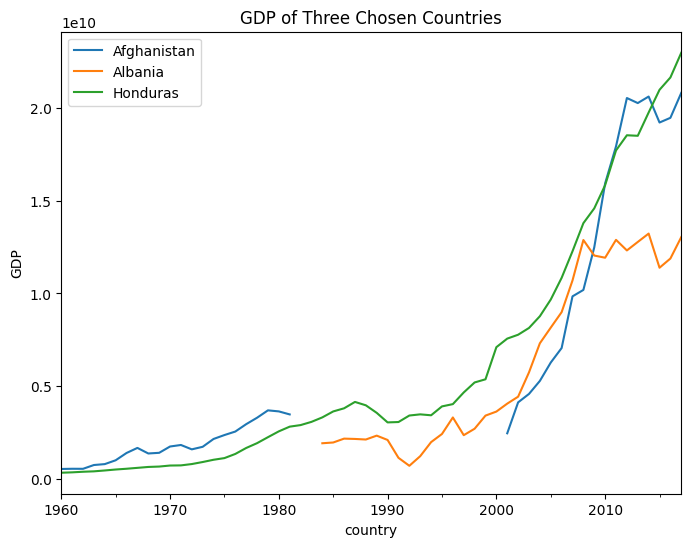

In [129]:
def plot_result(column_name): 
    fig, ax = plt.subplots(figsize = (8,6))
    
    df_melt[((df_melt['Country Name'] == 'Afghanistan') | 
            (df_melt['Country Name'] == 'Albania') | 
            (df_melt['Country Name'] == 'Honduras'))].groupby("Country Name").plot('year', column_name, legend = True, ax = ax)
    ax.legend(labels=['Afghanistan', 'Albania', 'Honduras'])
    ax.set_xlabel("country")
    ax.set_ylabel("GDP")
    ax.set_title("GDP of Three Chosen Countries")
    
plot_result("GDP")


In [130]:
df_melt

,Country Name,Country Code,Indicator Name,Indicator Code,year,GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,5.377778e+08
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN
...,...,...,...,...,...,...
15307,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,2017-01-01,7.128691e+09
15308,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,2017-01-01,NaN
15309,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,2017-01-01,3.494193e+11
15310,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2017-01-01,2.580867e+10


In [131]:
df_nagdp = df_melt[df_melt.GDP.isna()].groupby("Country Name").GDP.size().reset_index().sort_values("GDP", ascending = False)

#### Delete countries with all null GDP over years 

In [132]:
columns = set(df_nagdp[df_nagdp.GDP == ""]["Country Name"])

In [133]:
columns 

set()

In [134]:
df_melt = df_melt[~df_melt["Country Name"].isin(columns)]

#### impute GDP for countries with a few null vlaues with their mean GDP values 

##### First Way: 

In [135]:
mean_dict = df_melt.groupby("Country Name").GDP.mean().to_dict()
df_melt["GDP"] = df_melt.GDP.fillna(df_melt["Country Name"].map(mean_dict))

Just some testing here ! 

In [136]:
std_dict = df_melt.groupby("Country Name").GDP.std().to_dict()
df_melt["std_dev1"] = df_melt.groupby("Country Name").GDP.transform(lambda x: x.std())
df_melt["std_dev2"] = df_melt["Country Name"].map(std_dict) 

##### Second Way: 


In [137]:
import copy 
df_melt2 = copy.deepcopy(df_melt)

In [138]:
df_melt2

,Country Name,Country Code,Indicator Name,Indicator Code,year,GDP,std_dev1,std_dev2
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,2.036355e+09,2.605673e+08,2.605673e+08
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,5.377778e+08,5.806887e+09,5.806887e+09
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,3.847557e+10,3.410245e+10,3.410245e+10
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,6.220172e+09,3.535985e+09,3.535985e+09
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,1.501056e+09,1.176061e+09,1.176061e+09
...,...,...,...,...,...,...,...,...
15307,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,2017-01-01,7.128691e+09,9.764948e+08,9.764948e+08
15308,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,2017-01-01,1.701070e+10,8.329469e+09,8.329469e+09
15309,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,2017-01-01,3.494193e+11,1.191333e+11,1.191333e+11
15310,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2017-01-01,2.580867e+10,7.857167e+09,7.857167e+09


In [139]:
df_melt2['GDP_filled'] = df_melt2.groupby('Country Name')['GDP'].transform(lambda x: x.fillna(x.mean()))


What to draw out here: 
+ You can impute statistics by both using transform or map 
+ You can both add a statistics by using transform or map 


#### Impute null values in GDP columns using Forward filling method 


In [140]:
df_melt["GDP_ffilling"] = df_melt.sort_values("year").groupby("Country Name").GDP.fillna(method = "ffill")

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2968\2943709861.py:1: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_melt["GDP_ffilling"] = df_melt.sort_values("year").groupby("Country Name").GDP.fillna(method = "ffill")
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2968\2943709861.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_melt["GDP_ffilling"] = df_melt.sort_values("year").groupby("Country Name").GDP.fillna(method = "ffill")


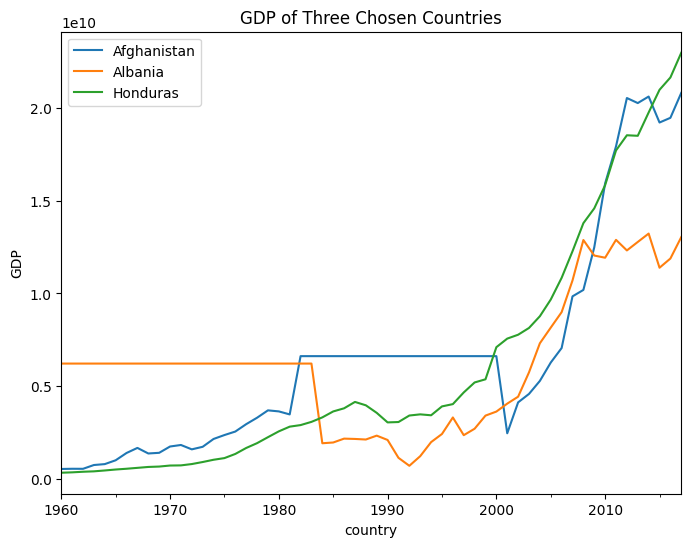

In [141]:
plot_result("GDP_ffilling")

#### Impute null values in GDP columns using backward filling method 


In [142]:
df_melt["GDP_bfilling"] = df_melt.sort_values("year").groupby("Country Name").GDP.fillna(method = "bfill")

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2968\3614231218.py:1: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_melt["GDP_bfilling"] = df_melt.sort_values("year").groupby("Country Name").GDP.fillna(method = "bfill")
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2968\3614231218.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_melt["GDP_bfilling"] = df_melt.sort_values("year").groupby("Country Name").GDP.fillna(method = "bfill")


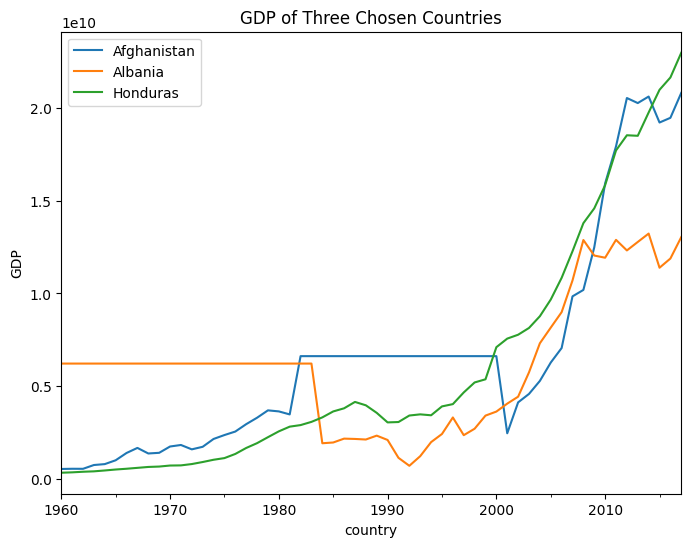

In [143]:
plot_result("GDP_bfilling")

### Duplicate Data 

In [144]:
df_projects

,id,regionname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,Latitude,Longitude,Offcial Country Name,Country Code,approvalyear,approvalday,approvalweekday,closingyear,closingday,closingweekday
0,P162228,Other,RE,Investment Project Financing,IN,C,N,L,Active,Active,...,NaN,NaN,World,"257 WLD Name: Country Code, dtype: object",2018.0,28.0,3.0,NaN,NaN,NaN
1,P163962,Africa,PE,Investment Project Financing,IN,B,N,L,Active,Active,...,NaN,NaN,Democratic Republic of the Congo,COD,2018.0,28.0,3.0,2023.0,31.0,6.0
2,P167672,South Asia,PE,Investment Project Financing,IN,NaN,Y,L,Active,Active,...,NaN,NaN,People's Republic of Bangladesh,BGD,2018.0,28.0,3.0,NaN,NaN,NaN
3,P158768,South Asia,PE,Investment Project Financing,IN,A,N,L,Active,Active,...,NaN,NaN,Islamic Republic of Afghanistan,,2018.0,27.0,2.0,2023.0,28.0,2.0
4,P161364,Africa,PE,Investment Project Financing,IN,B,N,L,Active,Active,...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,Federal Republic of Nigeria,NGA,2018.0,27.0,2.0,2023.0,31.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,PE,Specific Investment Loan,IN,NaN,N,L,Closed,Closed,...,NaN,NaN,Republic of Chile,CHL,1948.0,25.0,3.0,1954.0,31.0,4.0
18244,P037451,Europe and Central Asia,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,Closed,...,NaN,NaN,Grand Duchy of Luxembourg,LUX,1947.0,28.0,3.0,1949.0,31.0,3.0
18245,P037362,Europe and Central Asia,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,Closed,...,NaN,NaN,Kingdom of Denmark,DNK,1947.0,22.0,4.0,1949.0,31.0,3.0
18246,P037452,Europe and Central Asia,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,Closed,...,NaN,NaN,Kingdom of the Netherlands,NLD,1947.0,7.0,3.0,1948.0,30.0,2.0


In [145]:
df_projects[df_projects.totalamt>1000000000]["Offcial Country Name"].nunique()

17

### Dummy Variables: 

In [146]:
df_projects

,id,regionname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,Latitude,Longitude,Offcial Country Name,Country Code,approvalyear,approvalday,approvalweekday,closingyear,closingday,closingweekday
0,P162228,Other,RE,Investment Project Financing,IN,C,N,L,Active,Active,...,NaN,NaN,World,"257 WLD Name: Country Code, dtype: object",2018.0,28.0,3.0,NaN,NaN,NaN
1,P163962,Africa,PE,Investment Project Financing,IN,B,N,L,Active,Active,...,NaN,NaN,Democratic Republic of the Congo,COD,2018.0,28.0,3.0,2023.0,31.0,6.0
2,P167672,South Asia,PE,Investment Project Financing,IN,NaN,Y,L,Active,Active,...,NaN,NaN,People's Republic of Bangladesh,BGD,2018.0,28.0,3.0,NaN,NaN,NaN
3,P158768,South Asia,PE,Investment Project Financing,IN,A,N,L,Active,Active,...,NaN,NaN,Islamic Republic of Afghanistan,,2018.0,27.0,2.0,2023.0,28.0,2.0
4,P161364,Africa,PE,Investment Project Financing,IN,B,N,L,Active,Active,...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,Federal Republic of Nigeria,NGA,2018.0,27.0,2.0,2023.0,31.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,PE,Specific Investment Loan,IN,NaN,N,L,Closed,Closed,...,NaN,NaN,Republic of Chile,CHL,1948.0,25.0,3.0,1954.0,31.0,4.0
18244,P037451,Europe and Central Asia,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,Closed,...,NaN,NaN,Grand Duchy of Luxembourg,LUX,1947.0,28.0,3.0,1949.0,31.0,3.0
18245,P037362,Europe and Central Asia,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,Closed,...,NaN,NaN,Kingdom of Denmark,DNK,1947.0,22.0,4.0,1949.0,31.0,3.0
18246,P037452,Europe and Central Asia,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,Closed,...,NaN,NaN,Kingdom of the Netherlands,NLD,1947.0,7.0,3.0,1948.0,30.0,2.0


In [147]:
df_projects.columns[df_projects.isna().sum()>10000]

Index(['projectdoc ', 'majorsector_percent ', 'sector3', 'sector4', 'sector5',
       'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
       'theme3', 'theme4', 'theme5', 'theme ', 'financier', 'mjtheme1name',
       'mjtheme2name', 'mjtheme3name', 'mjtheme4name', 'mjtheme5name',
       'location', 'GeoLocID', 'GeoLocName', 'Latitude', 'Longitude'],
      dtype='object')

In [148]:
df_projects[df_projects.columns[df_projects.isna().sum()>10000]]

,projectdoc,majorsector_percent,sector3,sector4,sector5,mjsector1,mjsector2,mjsector3,mjsector4,mjsector5,...,mjtheme1name,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Other Agriculture; Fishing and Forestry!$!2!$!AZ,Other Public Administration!$!10!$!BZ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
sector = df_projects.copy()
sector = sector[['project_name', 'lendinginstr', 'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
          'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
          'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
          'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
          'mjtheme4name', 'mjtheme5name']]

In [150]:
uniquesectors1 = sector["sector1"].sort_values().unique()
uniquesectors1

array(['!$!0', '(Historic)Agency reform!$!50!$!AG',
       '(Historic)Agricultural credit!$!100!$!AC', ...,
       'Workforce Development and Vocational Education!$!96!$!EW',
       'Workforce Development and Vocational Education!$!98!$!EW',
       'Workforce Development and Vocational Education!$!99!$!EW'],
      shape=(3060,), dtype=object)

In [151]:
sector["sector1"] = sector["sector1"].replace("!$!0", np.nan)
sector["sector1"] = sector.sector1.replace("\(Historic\)","",regex = True)
sector["sector1"] = sector.sector1.replace("!.+!\d+!.+!.+","",regex = True)

<>:2: SyntaxWarning: invalid escape sequence '\('
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\('
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2968\3184616403.py:2: SyntaxWarning: invalid escape sequence '\('
  sector["sector1"] = sector.sector1.replace("\(Historic\)","",regex = True)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2968\3184616403.py:3: SyntaxWarning: invalid escape sequence '\d'
  sector["sector1"] = sector.sector1.replace("!.+!\d+!.+!.+","",regex = True)


In [152]:
print(f"len of sector1 is {len(sector.sector1.unique())} and the percentage of null value is {float(sector["sector1"].isna().sum()*100/sector.shape[0])} %")

len of sector1 is 156 and the percentage of null value is 3.4962735642262164 %


In [153]:
dummies = pd.get_dummies(sector.sector1)

In [154]:
df_projects["year"] = df_projects.boardapprovaldate.dt.year

In [155]:
df = df_projects[["totalamt", "year"]]
df_final = pd.concat([df, dummies], axis = 1)
df_final.head(5)

,totalamt,year,Adult; Basic and Continuing Education,Agency reform,Agricultural Extension; Research; and Other Support Activities,Agricultural credit,Agricultural extension,Agricultural markets; commercialization and agri-business,Agriculture adjustment,Agro-industry,...,Urban environment,Urban housing,Urban management,Urban transport,Urban water supply,Vocational training,Waste Management,Water Supply,Water supply and sanitation adjustment,Workforce Development and Vocational Education
0,0,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,200000000,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,58330000,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,20000000,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,100000000,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Finding outliers: 

In [156]:
df_gdp.drop(["Country Code","Indicator Name", "Indicator Code"], inplace = True, axis =1 )
df_gdp.head(5)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [157]:
df_gdp.shape == df_indicator.shape

False

In [158]:
df_indicator.drop(["Country Code","Indicator Name","Indicator Code"], inplace = True, axis = 1)
df_indicator.columns  

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [159]:
gdp_melt = pd.melt(df_gdp, id_vars = ["Country Name"], var_name = "year", value_name = "GDP")
gdp_melt["GDP"] = gdp_melt.sort_values("year").groupby("Country Name").GDP.fillna(method = "ffill").fillna(method = "bfill")

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2968\707382416.py:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  gdp_melt["GDP"] = gdp_melt.sort_values("year").groupby("Country Name").GDP.fillna(method = "ffill").fillna(method = "bfill")
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2968\707382416.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdp_melt["GDP"] = gdp_melt.sort_values("year").groupby("Country Name").GDP.fillna(method = "ffill").fillna(method = "bfill")


In [160]:
population_melt = pd.melt(df_indicator, id_vars = ["Country Name"], var_name = "year", value_name = "population")
population_melt["population"] = population_melt.sort_values("year").groupby("Country Name").population.fillna(method = "ffill").fillna(method = "bfill")

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2968\3025931292.py:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  population_melt["population"] = population_melt.sort_values("year").groupby("Country Name").population.fillna(method = "ffill").fillna(method = "bfill")
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_2968\3025931292.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  population_melt["population"] = population_melt.sort_values("year").groupby("Country Name").population.fillna(method = "ffill").fillna(method = "bfill")


In [161]:
df_country = gdp_melt.merge(population_melt, how = "inner", on = ("Country Name", "year"))

In [162]:
df_2016 = df_country[df_country.year == "2016"]

### Finding Outliers: 

<Axes: >

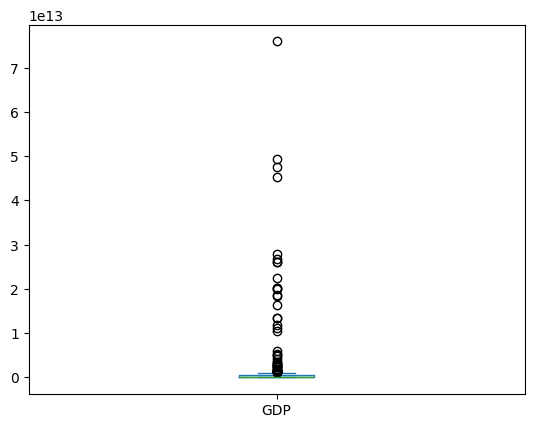

In [163]:
df_2016.plot("population", kind ="box")

<Axes: >

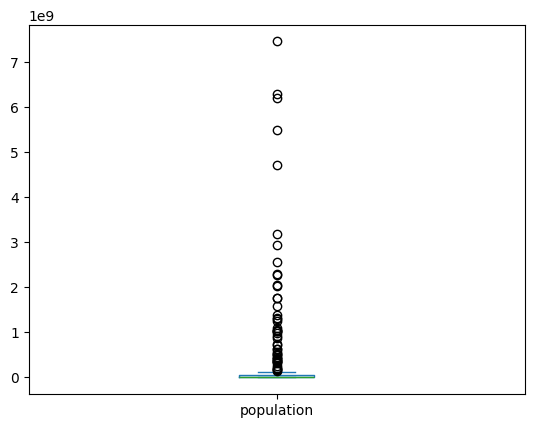

In [164]:
df_2016.plot("GDP", kind = "box")

In [165]:
import numpy as np 

In [166]:
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

df_2016 = df_2016[~df_2016["Country Name"].isin(non_countries)]

In [167]:
population_2016 = df_2016[["Country Name","population"]]
q1 = population_2016.population.quantile(0.25)
q3 = population_2016.population.quantile(0.75) 
iqr = (q3-q1) 
max_value = q3 + 1.5*iqr 
min_value = q1 - 1.5*iqr 

In [168]:
population_outliers = population_2016[(population_2016.population>max_value)|(population_2016.population<min_value)]
population_outliers 

,Country Name,population
14802,Bangladesh,1.629516e+08
14811,Brazil,2.076529e+08
14822,China,1.378665e+09
14825,"Congo, Dem. Rep.",7.873615e+07
14837,Germany,8.234867e+07
14849,"Egypt, Arab Rep.",9.568868e+07
14854,Ethiopia,1.024032e+08
14859,France,6.685977e+07
14863,United Kingdom,6.559556e+07
14888,Indonesia,2.611155e+08


In [169]:
gdp_2016 = df_2016[["Country Name","GDP"]]
Q1 = gdp_2016.GDP.quantile(0.25)
Q3 = gdp_2016.GDP.quantile(0.75)
IQR = Q3-Q1
max_value = Q3 + 1.5*IQR 
min_value = Q1 - 1.5*IQR 
gdp_outliers = gdp_2016[(gdp_2016.GDP>max_value)|(gdp_2016.GDP<min_value)]
gdp_outliers 

,Country Name,GDP
14791,Argentina,5.548609e+11
14795,Australia,1.208039e+12
14796,Austria,3.908000e+11
14799,Belgium,4.675455e+11
14811,Brazil,1.793989e+12
14817,Canada,1.535768e+12
14819,Switzerland,6.687453e+11
14822,China,1.119099e+13
14837,Germany,3.477796e+12
14852,Spain,1.237255e+12


In [170]:
# use pandas intersection() method and python set() and list methods to find country names appearing in both outlier tables. 
(list(set(population_outliers["Country Name"]).intersection(gdp_outliers["Country Name"])))

['Nigeria',
 'Turkey',
 'Russian Federation',
 'Japan',
 'Mexico',
 'Germany',
 'China',
 'Thailand',
 'India',
 'France',
 'Brazil',
 'United States',
 'United Kingdom',
 'Italy',
 'Iran, Islamic Rep.',
 'Indonesia']

In [171]:
# find countries that are in population outliers but not in gdp_outliers: 
list(set(population_outliers['Country Name']) - set(gdp_outliers['Country Name']))


['Congo, Dem. Rep.',
 'Bangladesh',
 'Ethiopia',
 'Vietnam',
 'Pakistan',
 'Philippines',
 'Egypt, Arab Rep.']

In [172]:
# find countries that are in gdp_outliers but not in population outliers: 
list(set(gdp_outliers['Country Name']) - set(population_outliers['Country Name']))

['Korea, Rep.',
 'Belgium',
 'Spain',
 'Netherlands',
 'Sweden',
 'Argentina',
 'Poland',
 'Australia',
 'Saudi Arabia',
 'Canada',
 'Venezuela, RB',
 'Switzerland',
 'Austria']

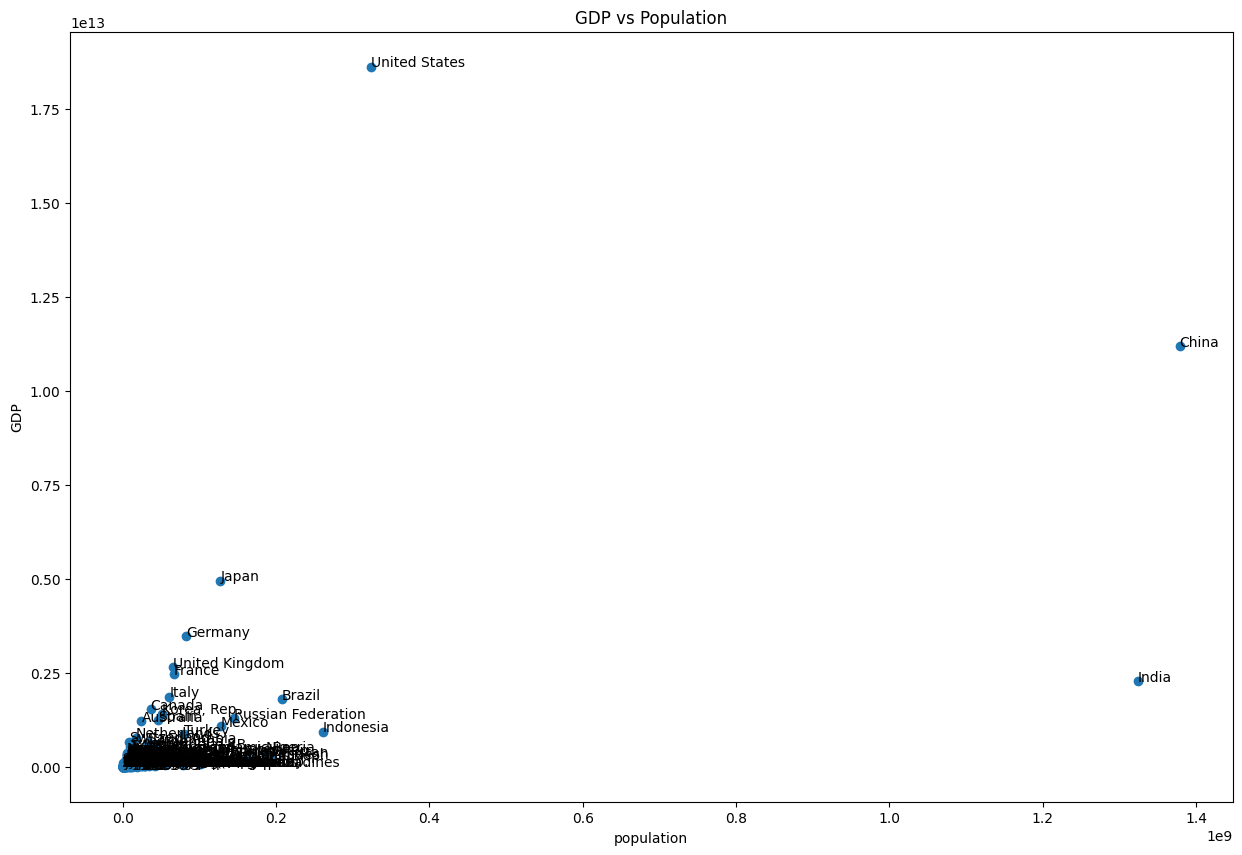

In [173]:
x = list(df_2016.population)
y = list(df_2016.GDP)
text = df_2016["Country Name"]
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(x,y)
plt.title("GDP vs Population")
plt.xlabel("population")
plt.ylabel("GDP")
for i,txt in enumerate(text): 
    ax.annotate(txt, (x[i],y[i]))

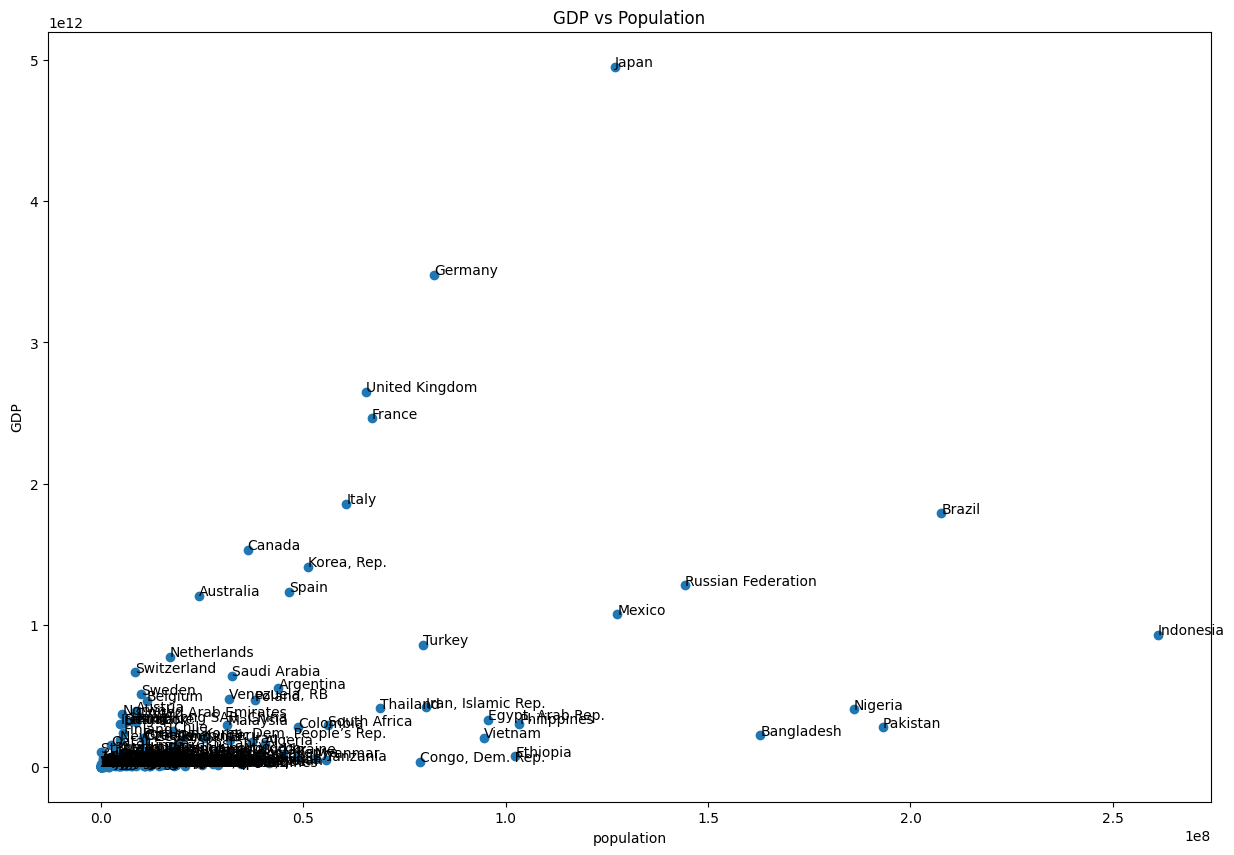

In [174]:
df_no_large = (df_2016['Country Name'] != 'United States') & (df_2016['Country Name'] != 'India') & (df_2016['Country Name'] != 'China')
x = list(df_2016[df_no_large]['population'])
y = list(df_2016[df_no_large]['GDP'])
text = df_2016[df_no_large]['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

In [175]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df_2016["population"].values.reshape(-1,1), df_2016.GDP.values.reshape(-1,1))

LinearRegression()

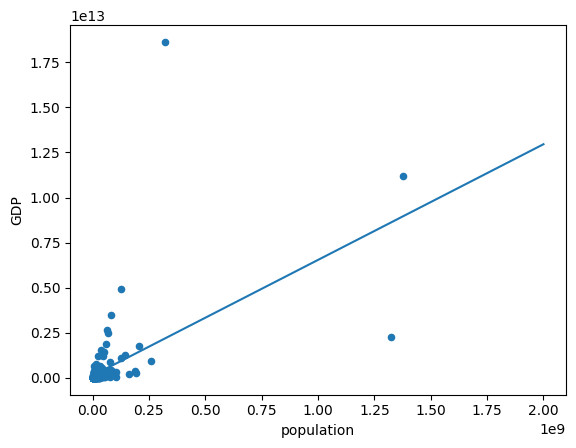

In [176]:
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))
df_2016.plot("population","GDP", kind = "scatter")
plt.plot(inputs, predictions)

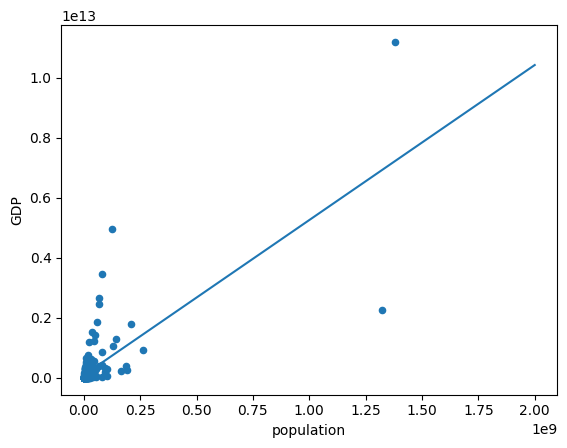

In [177]:
# Remove the United States to see what happens with the linear regression model
df_2016[df_2016['Country Name'] != 'United States'].plot('population', 'GDP', kind='scatter')
# plt.plot(inputs, predictions)
model.fit(df_2016[df_2016['Country Name'] != 'United States']['population'].values.reshape(-1, 1), 
          df_2016[df_2016['Country Name'] != 'United States']['GDP'].values.reshape(-1, 1))
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))
plt.plot(inputs, predictions)

### Eliminating Outliers: 

In [178]:
def IQR(data_frame, column_name): 
    data = data_frame[column_name]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1 
    max_value = q3+iqr*1.5
    min_value = q1-iqr*1.5
    return data_frame[(data_frame[column_name]<max_value)&(data_frame[column_name]>min_value)]

In [179]:

df_outlier_removed = df_2016.copy()

for column in ['population','GDP']:
    df_outlier_removed = IQR(df_outlier_removed, column)

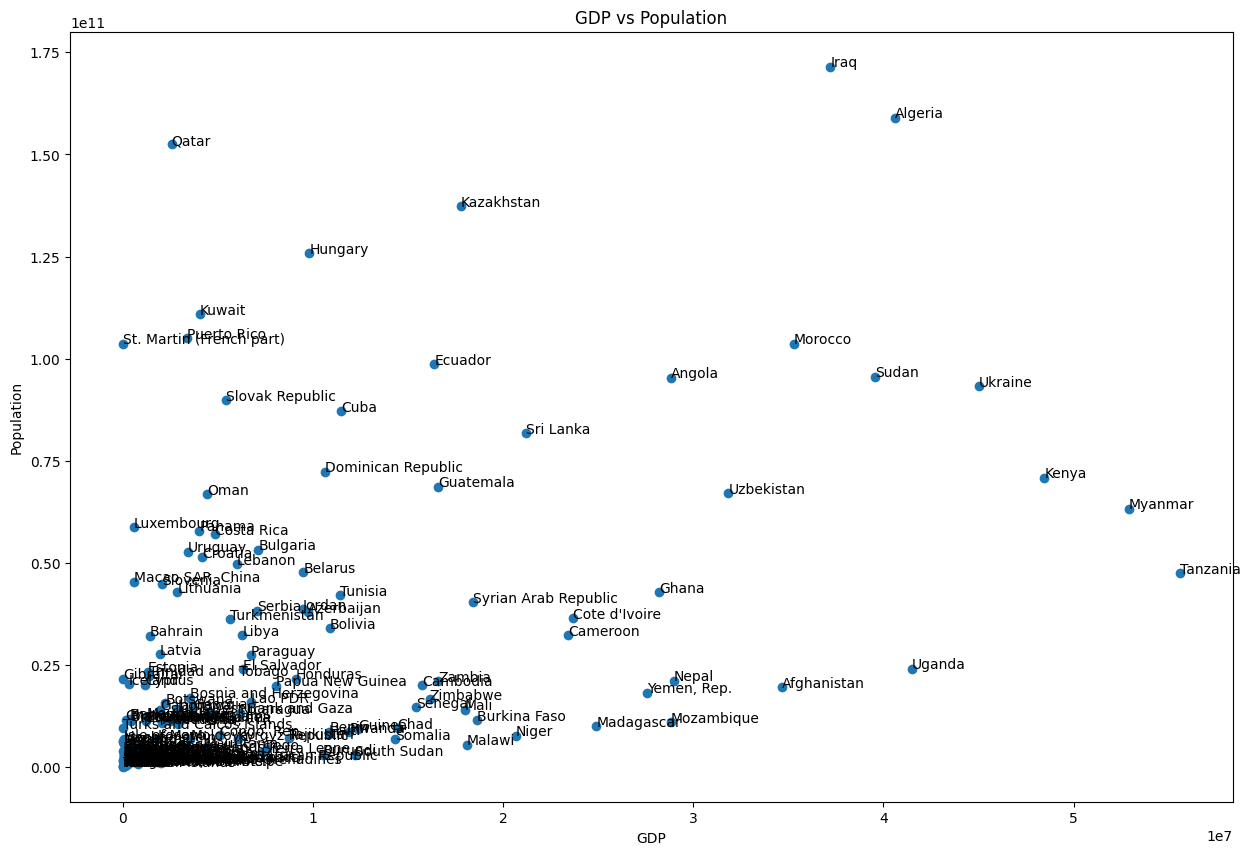

In [180]:
# plot the data
x = list(df_outlier_removed['population'])
y = list(df_outlier_removed['GDP'])
text = df_outlier_removed['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('GDP')
plt.ylabel('Population')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

### Scaling Data: 

#### First Way: 

In [181]:
# find min and max 
def x_min_max(data): 
    minimum = min(data)
    maximum = max(data) 
    return minimum, maximum 
# calculate the normalization 
def normalize(x, x_min, x_max): 
    return (x-x_min)/(x_max-x_min)

#### Second Way: 


In [182]:
class Normalizer(): 
    def __init__(self, dataframe): 
        self.params = []
        for col in dataframe.columns: 
            self.params.append(x_min_max(dataframe[col]))
        
    def x_min_max(self, data): 
        minimum = min(data)
        maximum = max(data) 
        return minimum, maximum 
    
    def normalize_data(self, x:list):
        normalized = []
        for index, value in enumerate(x): 
            minimum = self.params[index][0]
            maximum = self.params[index][1]
            normalized.append((value-minimum)/(maximum-minimum))
        return normalized




In [183]:
gdp_normalizer = Normalizer(df_2016[['GDP', 'population']])


In [184]:
gdp_normalizer.params


[(36572611.8853148, 18624475000000.0), (11097.0, 1378665000.0)]

In [185]:
gdp_normalizer.normalize_data([13424475000000.0, 1300000000])


[0.7207969507229194, 0.9429407193285986]

# LOAD: 


In [186]:
df_indicator.to_csv("C:\\Users\\VICTUS\\Desktop\\personal project\\ETL_guided_project\\df_indicator.csv", index = False)

In [ ]:
def python_to_mongoDB(dataframe, connection_string, database, collection): 
    client = MongoClient(connection_string)
    database = client[database]
    collection = database[collection]
    dataframe = dataframe.where(pd.notnull(dataframe), "None") 
    data = dataframe.to_dict(orient="records")
    collection.insert_many(data)
    print("Data are poured into MongoDB")

python_to_mongoDB(df_projects, 'mongodb://localhost:27017/', 'local', 'df_projects')



In [243]:
import pymysql
from sqlalchemy import create_engine

In [250]:
df_test = df_projects[["id","regionname"]]
new_table = """ Create table df_test(
id varchar(10) Primary Key, 
regionname varchar(50))"""

mydb = pymysql.connect(
            host="localhost",
            user="root",
            password="",
            database="ETL_guided_project"
)

cursor = mydb.cursor()
cursor.execute(new_table)
mydb.commit()

engine = create_engine("mysql+pymysql://root:@localhost/ETL_guided_project")
df_test.to_sql("df_test", con = engine, if_exists="append", index = False)

cursor.close()
mydb.close()


18248